# Connection matrices

The connection matrices of the subtargets are all inside a hdf5 file encoded in the npz format given by scipy.sparse.
For easy access to the data, we are going to import a read method that handles all the complicated stuff

In [1]:
import sys
import os
import importlib

# Location of the file that has the read method. Eventually we will have to make this an installable package.
path_base = ("/gpfs/bbp.cscs.ch/project/proj83/scratch/home/reimann/"
            "topological-analysis-of-subvolumes")
pck_root = os.path.join(path_base, "scripts")
sys.path.insert(0, pck_root)
from write_results import read_toc_plus_payload

# Location of the data
fn_data = os.path.join(path_base, "results2/topological_sampling.h5")
# Use imported function to read data
toc = read_toc_plus_payload((fn_data, "con_mats/con_mats_original"), "analysis")

display(toc)

circuit  connectome  subtarget  flat_x      flat_y   
Bio_M    local       R10;C10    101.859472  88.212891    <write_results.read_toc_plus_payload.<locals>....
                     R10;C11    112.045420  88.212891    <write_results.read_toc_plus_payload.<locals>....
                     R10;C12    122.231367  88.212891    <write_results.read_toc_plus_payload.<locals>....
                     R10;C15    152.789208  88.212891    <write_results.read_toc_plus_payload.<locals>....
                     R10;C16    162.975156  88.212891    <write_results.read_toc_plus_payload.<locals>....
                                                                               ...                        
                     R9;C5      56.022710   79.391602    <write_results.read_toc_plus_payload.<locals>....
                     R9;C6      66.208657   79.391602    <write_results.read_toc_plus_payload.<locals>....
                     R9;C7      76.394604   79.391602    <write_results.read_toc_plus_payl

In [7]:
for index, _ in toc.head().iteritems():
    print(index)

('Bio_M', 'local', 'R10;C10', 101.85947229667751, 88.212890625)
('Bio_M', 'local', 'R10;C11', 112.0454195263453, 88.21289062500003)
('Bio_M', 'local', 'R10;C12', 122.23136675601303, 88.212890625)
('Bio_M', 'local', 'R10;C15', 152.7892084450163, 88.21289062499999)
('Bio_M', 'local', 'R10;C16', 162.97515567468406, 88.212890625)


Note that at this stage the actual matrices are not yet loaded into memory.
The pandas.Series only has references to their location in the hdf file as values.
They are loaded the first time you access them, and this can take a few seconds

In [3]:
M = toc.iloc[50].matrix

print("Mean in-degree: {0}".format(M.sum(axis=0).mean()))

Mean in-degree: 241.2162986796849


As a result calculating just the in-degree will take a minute, because the matrices have to be read before the calculation.
However, once a matrix has been accessed once, it will stay in memory and be immediatelly available.

In [4]:
from tqdm import tqdm
import pandas

all_in_degrees_raw = [m.matrix.sum(axis=0).mean() for m in tqdm(toc.values)]
all_in_degrees = pandas.Series(all_in_degrees_raw, index=toc.index)

display(all_in_degrees)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:40<00:00,  3.30it/s]


circuit  connectome  subtarget  flat_x      flat_y   
Bio_M    local       R10;C10    101.859472  88.212891    257.746633
                     R10;C11    112.045420  88.212891    136.172902
                     R10;C12    122.231367  88.212891      0.571429
                     R10;C15    152.789208  88.212891      5.938272
                     R10;C16    162.975156  88.212891    115.084301
                                                            ...    
                     R9;C5      56.022710   79.391602    276.825340
                     R9;C6      66.208657   79.391602    220.044825
                     R9;C7      76.394604   79.391602    283.507019
                     R9;C8      86.580551   79.391602    283.407812
                     R9;C9      96.766499   79.391602    241.680709
Length: 133, dtype: float64

Example: plot mean in-degrees

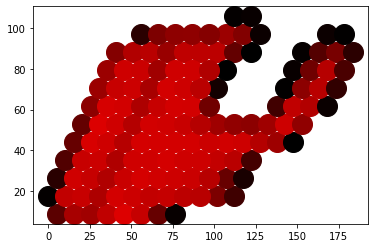

In [5]:
import numpy
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.gca()

for idx, val in all_in_degrees.items():
    ax.plot(idx[3], idx[4], marker='o', ms=20, color=[numpy.minimum(1.0, val / 350), 0, 0])